In [80]:
from math import sqrt

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("dates").getOrCreate()

In [2]:
# Read in data and store in dataframe
#csv = "Resources/test10K.csv"
csv = "Resources/GoBikeMerged2017_2018.csv"
df = spark.read.csv(csv, header=True, inferSchema=True)

In [3]:
# Show dataframe
df.show()

+---+-------+------------+--------------+--------------------+---------------------+--------------------+--------------------+-----------------+-------------+----------------+----------------------+-----------------------+--------------------+--------------------+----------+------------------+-------------+------------------+-----------+-------+--------+-------------------+
|_c0|bike_id|duration_sec|end_station_id|end_station_latitude|end_station_longitude|    end_station_name|            end_time|member_birth_year|member_gender|start_station_id|start_station_latitude|start_station_longitude|  start_station_name|          start_time| user_type|start_neighborhood|start_zipcode|  end_neighborhood|end_zipcode|temp(f)|pressure|weather_description|
+---+-------+------------+--------------+--------------------+---------------------+--------------------+--------------------+-----------------+-------------+----------------+----------------------+-----------------------+--------------------+---

In [4]:
df = df.select(['_c0', 'start_time', 'temp(f)', 'pressure', 'weather_description'])
df.show()

+---+--------------------+-------+--------+-------------------+
|_c0|          start_time|temp(f)|pressure|weather_description|
+---+--------------------+-------+--------+-------------------+
|  0|2017-06-28 09:47:...|   62.0|  1021.0|         light_rain|
|  1|2017-06-28 09:47:...|   62.0|  1021.0|         light_rain|
|  2|2017-06-28 09:49:...|   62.0|  1021.0|         light_rain|
|  3|2017-06-28 09:50:...|   62.0|  1021.0|         light_rain|
|  4|2017-06-28 09:56:...|   62.0|  1021.0|         light_rain|
|  5|2017-06-28 09:56:...|   62.0|  1021.0|         light_rain|
|  6|2017-06-28 09:58:...|   62.0|  1021.0|         light_rain|
|  7|2017-06-28 10:00:...|   64.0|  1015.0|         light_rain|
|  8|2017-06-28 10:00:...|   64.0|  1015.0|         light_rain|
|  9|2017-06-28 10:09:...|   64.0|  1015.0|         light_rain|
| 10|2017-06-28 10:11:...|   64.0|  1015.0|         light_rain|
| 11|2017-06-28 10:11:...|   64.0|  1015.0|         light_rain|
| 12|2017-06-28 10:12:...|   64.0|  1015

In [5]:
# Find day of the week
from pyspark.sql.functions import dayofweek

In [6]:
 #df.select(dayofweek('datetime_PST').alias('day')).collect()

In [7]:
# Save the day of the week as a new column
df = df.withColumn("day_of_week", dayofweek('start_time'))
df.show()

+---+--------------------+-------+--------+-------------------+-----------+
|_c0|          start_time|temp(f)|pressure|weather_description|day_of_week|
+---+--------------------+-------+--------+-------------------+-----------+
|  0|2017-06-28 09:47:...|   62.0|  1021.0|         light_rain|          4|
|  1|2017-06-28 09:47:...|   62.0|  1021.0|         light_rain|          4|
|  2|2017-06-28 09:49:...|   62.0|  1021.0|         light_rain|          4|
|  3|2017-06-28 09:50:...|   62.0|  1021.0|         light_rain|          4|
|  4|2017-06-28 09:56:...|   62.0|  1021.0|         light_rain|          4|
|  5|2017-06-28 09:56:...|   62.0|  1021.0|         light_rain|          4|
|  6|2017-06-28 09:58:...|   62.0|  1021.0|         light_rain|          4|
|  7|2017-06-28 10:00:...|   64.0|  1015.0|         light_rain|          4|
|  8|2017-06-28 10:00:...|   64.0|  1015.0|         light_rain|          4|
|  9|2017-06-28 10:09:...|   64.0|  1015.0|         light_rain|          4|
| 10|2017-06

In [8]:
# Save the day of the week, year, month and hour as a new columns
from pyspark.sql.functions import year, month, dayofmonth, hour
df = df.withColumn("year", year('start_time'))
df = df.withColumn("month", month('start_time'))
df = df.withColumn("day_of_month", dayofmonth('start_time'))

df = df.withColumn("hour", hour('start_time'))
df.show()

+---+--------------------+-------+--------+-------------------+-----------+----+-----+------------+----+
|_c0|          start_time|temp(f)|pressure|weather_description|day_of_week|year|month|day_of_month|hour|
+---+--------------------+-------+--------+-------------------+-----------+----+-----+------------+----+
|  0|2017-06-28 09:47:...|   62.0|  1021.0|         light_rain|          4|2017|    6|          28|   9|
|  1|2017-06-28 09:47:...|   62.0|  1021.0|         light_rain|          4|2017|    6|          28|   9|
|  2|2017-06-28 09:49:...|   62.0|  1021.0|         light_rain|          4|2017|    6|          28|   9|
|  3|2017-06-28 09:50:...|   62.0|  1021.0|         light_rain|          4|2017|    6|          28|   9|
|  4|2017-06-28 09:56:...|   62.0|  1021.0|         light_rain|          4|2017|    6|          28|   9|
|  5|2017-06-28 09:56:...|   62.0|  1021.0|         light_rain|          4|2017|    6|          28|   9|
|  6|2017-06-28 09:58:...|   62.0|  1021.0|         lig

In [9]:
# Filtering out weekend days (day 1 is Sunday, day 7 is Saturday)
#df = df.filter( (df["day_of_week"] > 1) & (df['day_of_week'] < 7) )

In [10]:
#To do
#Filter out holidays

In [11]:
grouped_df = df.groupBy(['year', 'month', 'day_of_month', 'hour', 'day_of_week', 'temp(f)', 'weather_description', 'pressure']).count()
#grouped_df = df.groupBy(['hour']).count()
grouped_df.show()

+----+-----+------------+----+-----------+-------+-------------------+--------+-----+
|year|month|day_of_month|hour|day_of_week|temp(f)|weather_description|pressure|count|
+----+-----+------------+----+-----------+-------+-------------------+--------+-----+
|2017|    6|          29|  23|          5|   60.0|         light_rain|  1017.0|    6|
|2017|    7|          18|  14|          3|   71.0|             cloudy|  1018.0|   49|
|2017|    7|          25|  23|          3|   64.0|             cloudy|  1016.0|    5|
|2017|    8|           9|   9|          4|   62.0|         light_rain|  1014.0|  207|
|2017|    8|           9|  13|          4|   68.0|             cloudy|  1016.0|   96|
|2017|    8|          13|  21|          1|   67.0|         light_rain|  1013.0|   20|
|2017|    8|          22|   9|          3|   64.0|              foggy|  1017.0|  243|
|2017|    8|          23|   6|          4|   61.0|         light_rain|  1015.0|   55|
|2017|    8|          24|   1|          5|   62.0|    

In [12]:
#This is a simple data set with day of the week, hour and bikeride count
#simple_df = df.groupBy(['hour', 'day_of_week']).count()
#simple_df.show()

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)

In [93]:
#Converting into pandas dataframe
import pandas as pd
pandas_df = grouped_df.toPandas()
#pandas_df = pandas_df.set_index('hour')
#pandas_df['hour'] = pandas_df.index
pandas_df.head()

,year,month,day_of_month,hour,day_of_week,temp(f),weather_description,pressure,count
0,2017,6,29,23,5,60.0,light_rain,1017.0,6
1,2017,7,18,14,3,71.0,cloudy,1018.0,49
2,2017,7,25,23,3,64.0,cloudy,1016.0,5
3,2017,8,9,9,4,62.0,light_rain,1014.0,207
4,2017,8,9,13,4,68.0,cloudy,1016.0,96


In [94]:
#Finding hours (rows) with no temperature description and filling in values with averages
#pandas_df[pd.isnull(pandas_df['temp(f)'])]
pandas_df.mean(axis=0, skipna=True)

year            2017.503123
month              6.419529
day_of_month      15.788570
hour              11.576515
day_of_week        4.028524
temp(f)           60.064884
pressure        1016.842963
count            123.283989
dtype: float64

In [95]:
pandas_df[pd.isnull(pandas_df['temp(f)'])]

,year,month,day_of_month,hour,day_of_week,temp(f),weather_description,pressure,count
113,2018,3,24,0,7,NaN,None,NaN,11
170,2017,7,10,7,2,NaN,None,NaN,93
179,2017,12,5,14,3,NaN,None,NaN,81
520,2018,6,2,0,7,NaN,None,NaN,44
690,2017,11,8,0,4,NaN,None,NaN,9
936,2017,11,15,0,4,NaN,None,NaN,9
1089,2018,5,5,0,7,NaN,None,NaN,28
1709,2017,9,21,8,5,NaN,None,NaN,483
2027,2017,7,2,6,1,NaN,None,NaN,2
2307,2018,1,18,0,5,NaN,None,NaN,6


In [96]:
pandas_df['temp(f)'].fillna(60, inplace=True)
pandas_df['pressure'].fillna(1016.84, inplace=True)
pandas_df['weather_description'].fillna('cloudy', inplace=True)

In [97]:
print(pandas_df["weather_description"].unique())

['light_rain' 'cloudy' 'foggy' 'clear_skies' 'heavy_rain' 'thunderstorm']


In [98]:
#Grouping different weather descriptions into rain/no rain 
pandas_df['rain']= ((pandas_df['weather_description'] == 'light_rain') | (pandas_df['weather_description'] == 'heavy_rain') | (pandas_df['weather_description'] == 'thunderstorm'))
pandas_df.head()

,year,month,day_of_month,hour,day_of_week,temp(f),weather_description,pressure,count,rain
0,2017,6,29,23,5,60.0,light_rain,1017.0,6,True
1,2017,7,18,14,3,71.0,cloudy,1018.0,49,False
2,2017,7,25,23,3,64.0,cloudy,1016.0,5,False
3,2017,8,9,9,4,62.0,light_rain,1014.0,207,True
4,2017,8,9,13,4,68.0,cloudy,1016.0,96,False


In [99]:
#Removing weather description from dataframe
pandas_df = pandas_df.drop('weather_description', axis=1)
pandas_df.head()

,year,month,day_of_month,hour,day_of_week,temp(f),pressure,count,rain
0,2017,6,29,23,5,60.0,1017.0,6,True
1,2017,7,18,14,3,71.0,1018.0,49,False
2,2017,7,25,23,3,64.0,1016.0,5,False
3,2017,8,9,9,4,62.0,1014.0,207,True
4,2017,8,9,13,4,68.0,1016.0,96,False


In [100]:
#Checking there are no NA values in any row
pandas_df[pd.isnull(pandas_df['temp(f)'])]

,year,month,day_of_month,hour,day_of_week,temp(f),pressure,count,rain


Before we try to build a neural network, let’s look into feature correlation analysis. Basically, we are going to check the correlation between our features and see is there a certain connection between these features. 

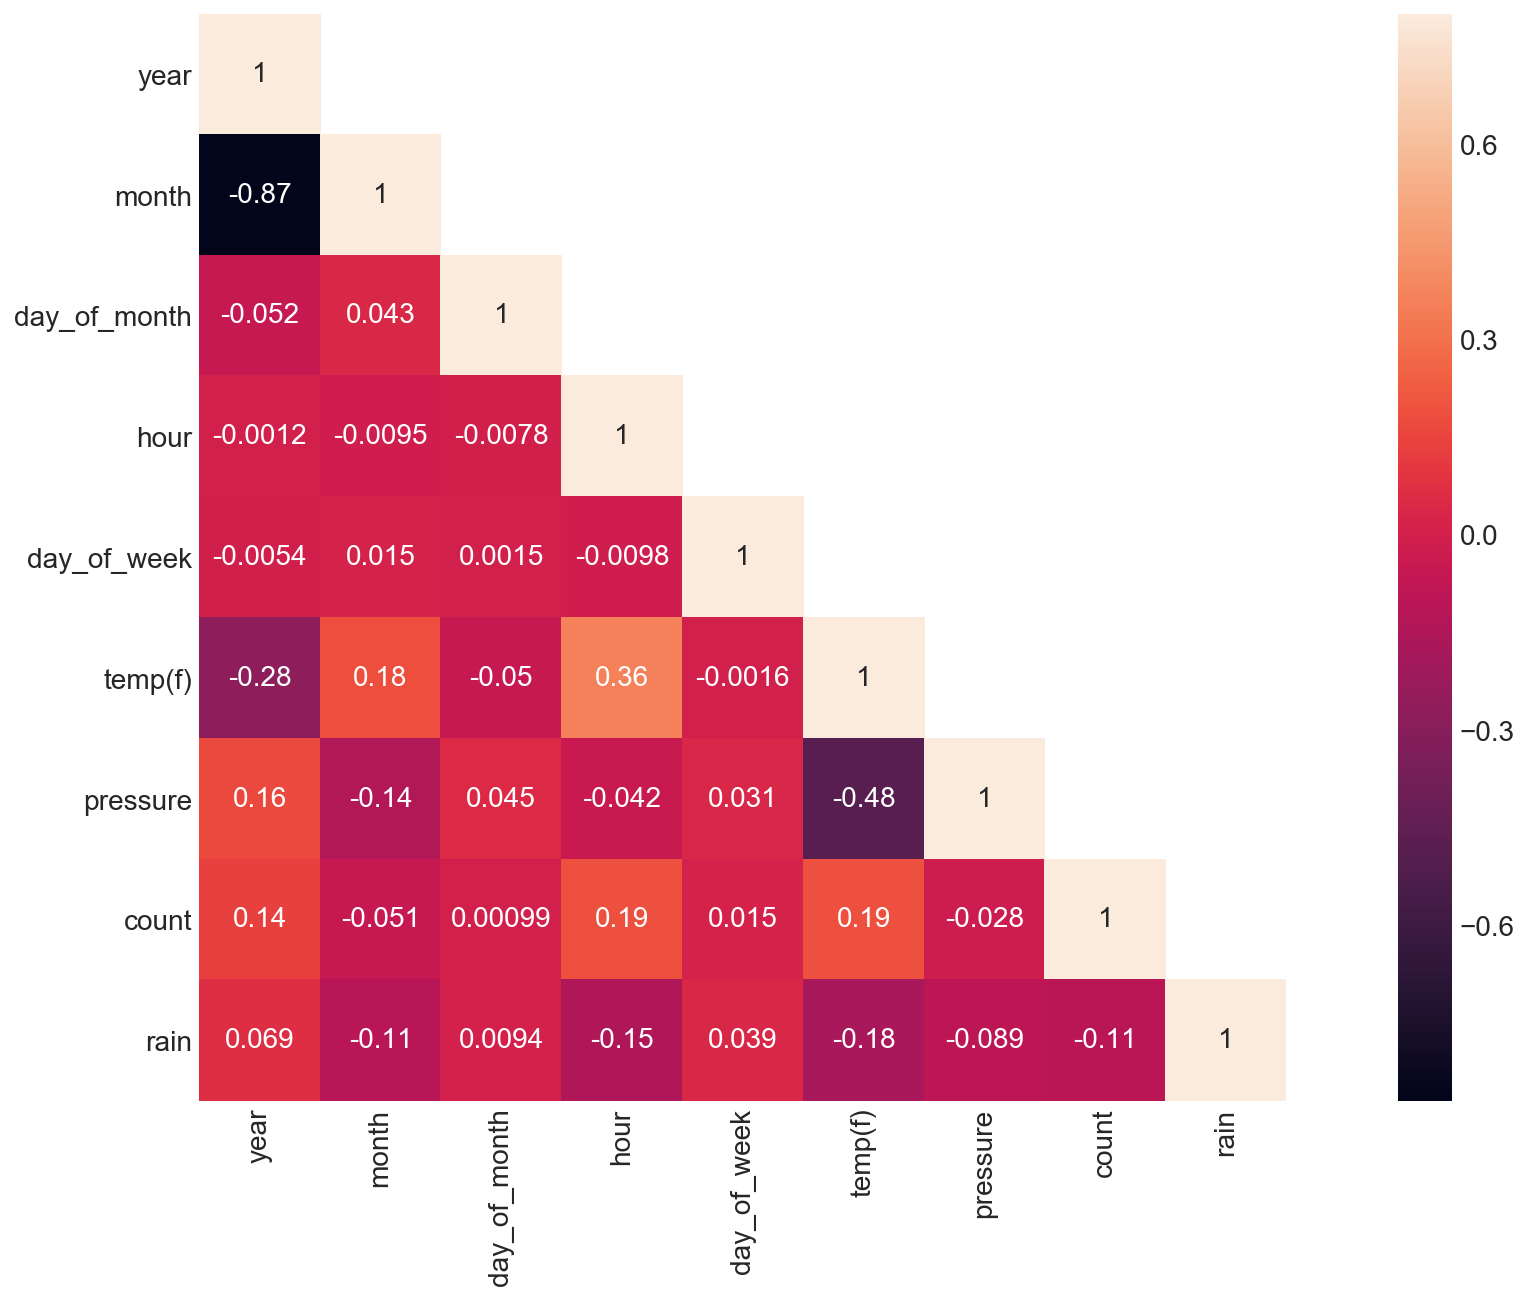

In [101]:
#Correlation visualization

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corrMatt = pandas_df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

What we wanted to get using this is to see what is the relationship between count and some of the features that we didn’t expect to affect this feature. We can see that the day of the month, month and even day of the week have a fairly low correlation with the number of bike rides (count). This tells us one important thing, we need to remove those columns because they are leakage variables. This means that these features would create overly optimistic if not completely invalid predictive models and that is why we have to remove them.

It's also interesting to see the correlation between temperature and hour as well as the month and year.

Looking at the difference in correlation between San Francisco and a colder city like Washington D.C. (see graph here: https://rubikscode.net/2018/06/25/machine-learning-with-ml-net-solving-real-world-regression-problem-bike-sharing-demands/), we noticed the temperature has a much lesser effect on the number of rides in a milder city such as San Francisco

In [102]:
#Re-creating date column with format YYYY-MM-DD HH:00:00
pandas_df['date'] = pandas_df['year'].astype(str)+'-'+pandas_df['month'].astype(str)+'-'+pandas_df['day_of_month'].astype(str)+' '+pandas_df['hour'].astype(str)+':00:00'
pandas_df['date'] = pd.to_datetime(pandas_df['date'])
pandas_df.head()

,year,month,day_of_month,hour,day_of_week,temp(f),pressure,count,rain,date
0,2017,6,29,23,5,60.0,1017.0,6,True,2017-06-29 23:00:00
1,2017,7,18,14,3,71.0,1018.0,49,False,2017-07-18 14:00:00
2,2017,7,25,23,3,64.0,1016.0,5,False,2017-07-25 23:00:00
3,2017,8,9,9,4,62.0,1014.0,207,True,2017-08-09 09:00:00
4,2017,8,9,13,4,68.0,1016.0,96,False,2017-08-09 13:00:00


In [103]:
#Ordering by date
pandas_df = pandas_df.sort_values(by='date')
pandas_df.head()

,year,month,day_of_month,hour,day_of_week,temp(f),pressure,count,rain,date
4125,2017,6,28,9,4,62.0,1021.0,7,True,2017-06-28 09:00:00
623,2017,6,28,10,4,64.0,1015.0,46,True,2017-06-28 10:00:00
7156,2017,6,28,11,4,67.0,1017.0,33,True,2017-06-28 11:00:00
120,2017,6,28,12,4,70.0,1016.0,44,True,2017-06-28 12:00:00
1734,2017,6,28,13,4,73.0,1019.0,40,True,2017-06-28 13:00:00


In [104]:
#Setting index to be date
pandas_df = pandas_df.set_index('date')
pandas_df.head()

,year,month,day_of_month,hour,day_of_week,temp(f),pressure,count,rain
date,,,,,,,,,
2017-06-28 09:00:00,2017,6,28,9,4,62.0,1021.0,7,True
2017-06-28 10:00:00,2017,6,28,10,4,64.0,1015.0,46,True
2017-06-28 11:00:00,2017,6,28,11,4,67.0,1017.0,33,True
2017-06-28 12:00:00,2017,6,28,12,4,70.0,1016.0,44,True
2017-06-28 13:00:00,2017,6,28,13,4,73.0,1019.0,40,True


In [105]:
#Finding range of dates
#pandas_df['date'] = pandas_df['year'].astype(str)+'-'+pandas_df['month'].astype(str)+'-'+pandas_df['day_of_month'].astype(str)
#pandas_df['date'] = pd.to_datetime(pandas_df['date'])
#pandas_df = pandas_df.sort_values(by='date')
#pandas_df.head()
pandas_df['date'] = pandas_df.index
print('date range of ipfix data: ')
display(pandas_df['date'].describe())
pandas_df.drop('date', axis=1)


date range of ipfix data: 


count                    9606
unique                   8584
top       2018-01-25 08:00:00
freq                        3
first     2017-06-28 09:00:00
last      2018-06-30 23:00:00
Name: date, dtype: object

,year,month,day_of_month,hour,day_of_week,temp(f),pressure,count,rain
date,,,,,,,,,
2017-06-28 09:00:00,2017,6,28,9,4,62.0,1021.0,7,True
2017-06-28 10:00:00,2017,6,28,10,4,64.0,1015.0,46,True
2017-06-28 11:00:00,2017,6,28,11,4,67.0,1017.0,33,True
2017-06-28 12:00:00,2017,6,28,12,4,70.0,1016.0,44,True
2017-06-28 13:00:00,2017,6,28,13,4,73.0,1019.0,40,True
2017-06-28 14:00:00,2017,6,28,14,4,75.0,1015.0,35,True
2017-06-28 15:00:00,2017,6,28,15,4,76.0,1015.0,55,True
2017-06-28 16:00:00,2017,6,28,16,4,77.0,1015.0,93,False
2017-06-28 17:00:00,2017,6,28,17,4,77.0,1018.0,118,True


In [106]:
#Plotting data over time
#pandas_df[:24*1].plot(x='date', y='count')
#pandas_df.plot(x='date', y='count')

In [107]:
#Plotting hour and temperature data
#pandas_df['temp_cut']=pd.cut(pandas_df["temp(f)"],[40,50,60,70,80])

#plt.rcParams['figure.figsize']=(14,12)
#plt.rcParams['font.size']=14
#sns.set_style("whitegrid")
#g=sns.swarmplot(x=pandas_df.index,y='count',hue='temp_cut',data=pandas_df)
#g.set(xlabel="Hour within a Day", ylabel="Number of bike Rental")

In [108]:
#Removing temporary column
#pandas_df = pandas_df.drop('temp_cut', axis=1)

In [109]:
#Plotting weekday and temperature data
pandas_df['weekday_boolean']= (pandas_df['day_of_week'] > 1) & (pandas_df['day_of_week'] <7)
pandas_df.head()

,year,month,day_of_month,hour,day_of_week,temp(f),pressure,count,rain,date,weekday_boolean
date,,,,,,,,,,,
2017-06-28 09:00:00,2017,6,28,9,4,62.0,1021.0,7,True,2017-06-28 09:00:00,True
2017-06-28 10:00:00,2017,6,28,10,4,64.0,1015.0,46,True,2017-06-28 10:00:00,True
2017-06-28 11:00:00,2017,6,28,11,4,67.0,1017.0,33,True,2017-06-28 11:00:00,True
2017-06-28 12:00:00,2017,6,28,12,4,70.0,1016.0,44,True,2017-06-28 12:00:00,True
2017-06-28 13:00:00,2017,6,28,13,4,73.0,1019.0,40,True,2017-06-28 13:00:00,True


[Text(0,0.5,'Number of bike Rental'), Text(0.5,0,'Hour within a Day')]

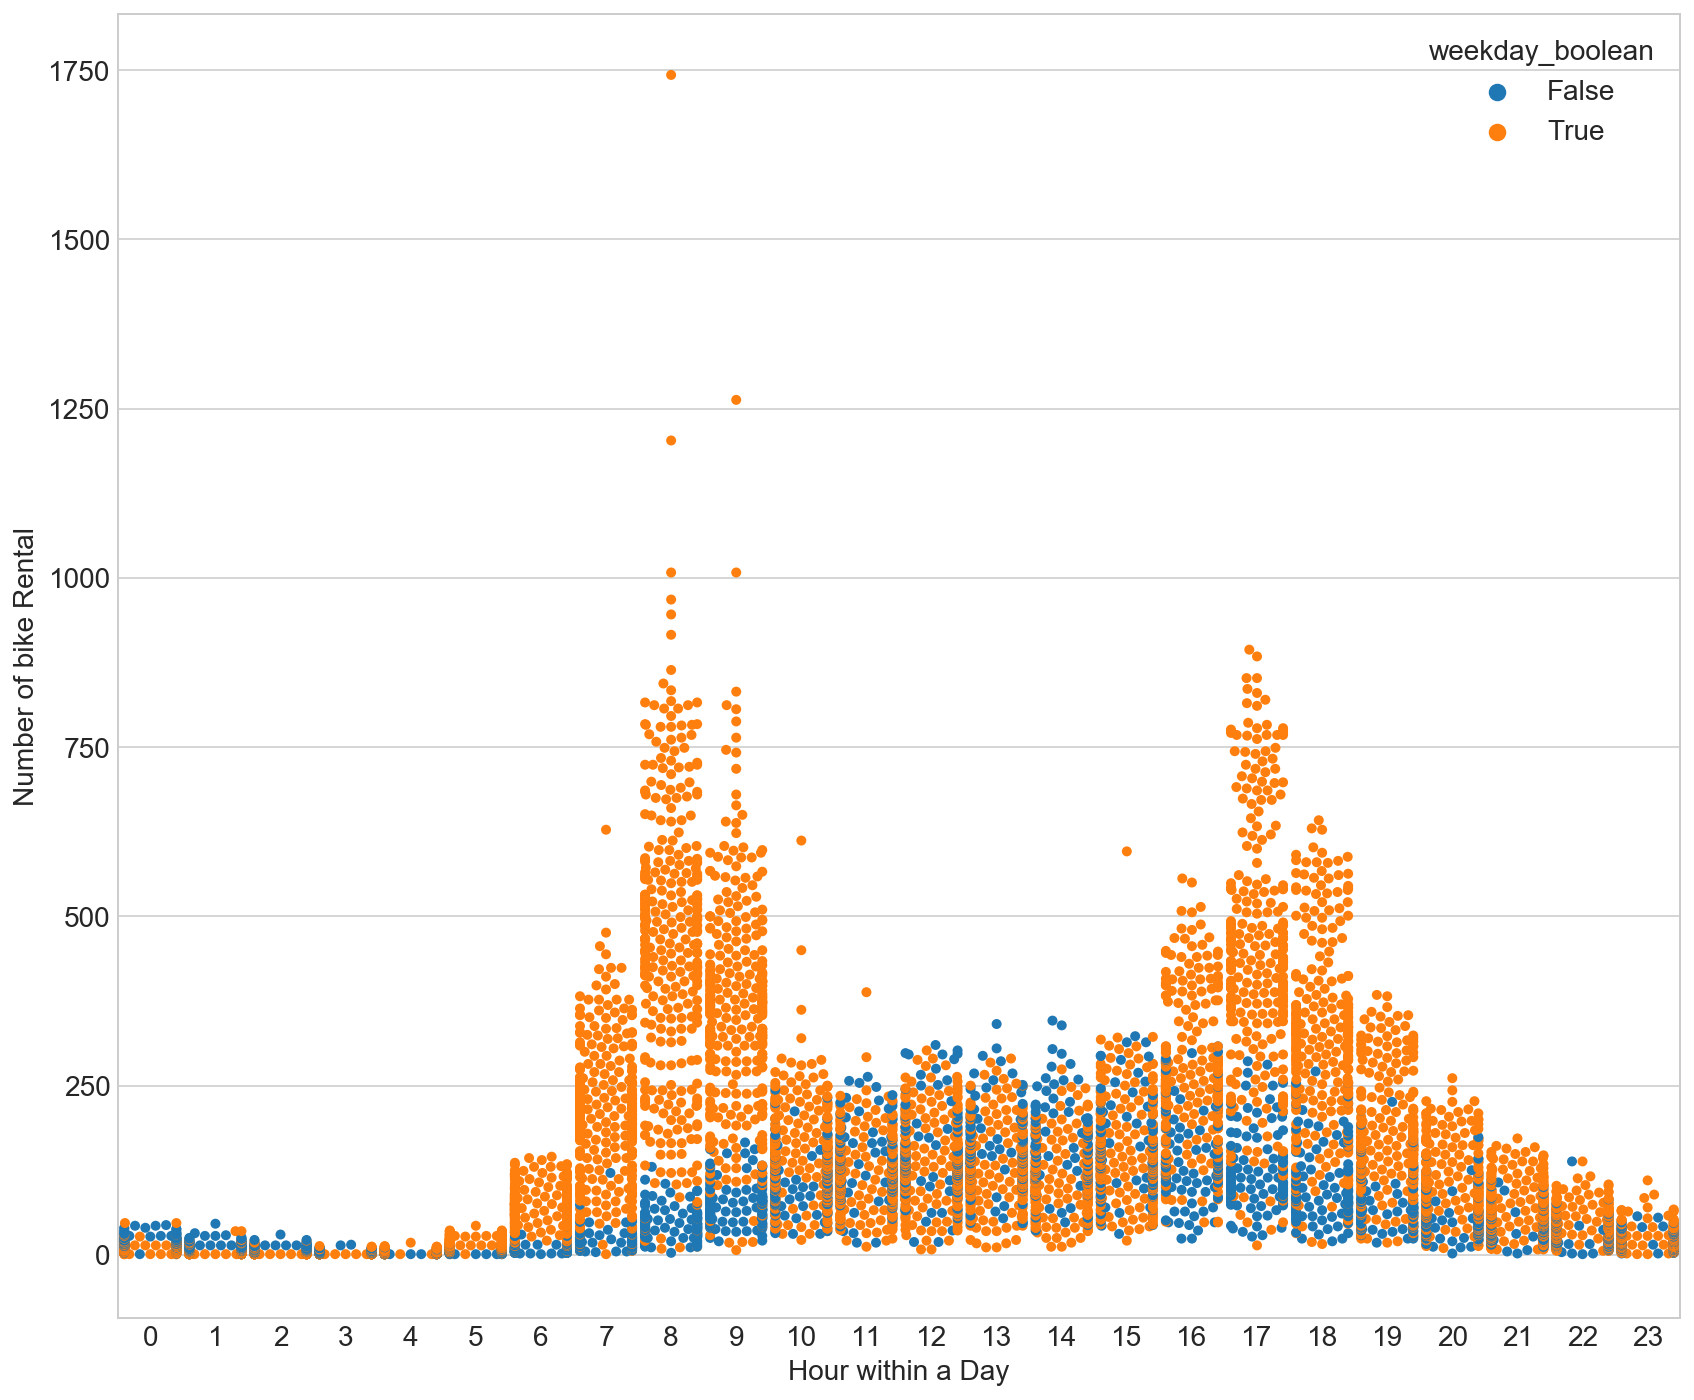

In [110]:
#Plotting weekday vs weekend and hour data
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=14
sns.set_style("whitegrid")
g=sns.swarmplot(x='hour',y='count',hue='weekday_boolean',data=pandas_df)
g.set(xlabel="Hour within a Day", ylabel="Number of bike Rental")

In [111]:
#Removing temporary column
pandas_df = pandas_df.drop('weekday_boolean', axis=1)

In [112]:
#Dropping unnecessary columns
fields_to_drop = ['year', 'month', 'hour','day_of_month', 'date']

pandas_df = pandas_df.drop(fields_to_drop, axis=1)

In [114]:
#Reordering columns so that count is the last column
cols = df.columns.tolist()
cols

['day_of_week', 'temp(f)', 'pressure', 'count', 'rain']

In [126]:
cols = cols[-1:] + cols[:-1]
#cols
pandas_df = pandas_df[cols]
pandas_df.head()

,rain,day_of_week,temp(f),pressure,count
date,,,,,
2017-06-28 09:00:00,True,4,62.0,1021.0,7
2017-06-28 10:00:00,True,4,64.0,1015.0,46
2017-06-28 11:00:00,True,4,67.0,1017.0,33
2017-06-28 12:00:00,True,4,70.0,1016.0,44
2017-06-28 13:00:00,True,4,73.0,1019.0,40


In [239]:
#Saving dataframe into new csv file

pandas_df.to_csv('Resources/GoBikeMerged2017_2018_clean.csv')



In [365]:
#Read from clean csv file
from pandas import read_csv
df = read_csv('Resources/GoBikeMerged2017_2018_clean.csv', header=0, index_col=0)

In [366]:
df.head()

,rain,day_of_week,temp(f),pressure,count
date,,,,,
2017-06-28 09:00:00,True,4,62.0,1021.0,7
2017-06-28 10:00:00,True,4,64.0,1015.0,46
2017-06-28 11:00:00,True,4,67.0,1017.0,33
2017-06-28 12:00:00,True,4,70.0,1016.0,44
2017-06-28 13:00:00,True,4,73.0,1019.0,40


In [367]:
#Remove entries for first day (doesn't have all 24 hours)
df = df[~df.index.str.contains("2017-06-28")]
df.head()

,rain,day_of_week,temp(f),pressure,count
date,,,,,
2017-06-29 00:00:00,True,5,62.0,1019.0,2
2017-06-29 05:00:00,True,5,60.0,1020.0,6
2017-06-29 06:00:00,True,5,57.0,1020.0,24
2017-06-29 07:00:00,True,5,63.0,1015.0,63
2017-06-29 08:00:00,False,5,60.0,1020.0,132


In [368]:
#The function below (series to supervised) expects the first column to be the output. 
cols = df.columns.tolist()
cols

['rain', 'day_of_week', 'temp(f)', 'pressure', 'count']

In [369]:
cols = cols[-1:] + cols[:-1]
cols

['count', 'rain', 'day_of_week', 'temp(f)', 'pressure']

In [370]:
#cols
df = df[cols]
df.head()

,count,rain,day_of_week,temp(f),pressure
date,,,,,
2017-06-29 00:00:00,2,True,5,62.0,1019.0
2017-06-29 05:00:00,6,True,5,60.0,1020.0
2017-06-29 06:00:00,24,True,5,57.0,1020.0
2017-06-29 07:00:00,63,True,5,63.0,1015.0
2017-06-29 08:00:00,132,False,5,60.0,1020.0


In [371]:
#Dropping weekday for now, since it's not a value, but a category
#To-do: convert weekday into label encoding
#df.drop('day_of_week', axis=1, inplace=True)
#df.head()

,count,rain,temp(f),pressure
date,,,,
2017-06-29 00:00:00,2,True,62.0,1019.0
2017-06-29 05:00:00,6,True,60.0,1020.0
2017-06-29 06:00:00,24,True,57.0,1020.0
2017-06-29 07:00:00,63,True,63.0,1015.0
2017-06-29 08:00:00,132,False,60.0,1020.0


In [372]:
values = df.values
#Return a Numpy representation of the DataFrame.
#Only the values in the DataFrame will be returned, the axes labels will be removed.
values

array([[2, True, 62.0, 1019.0],
       [6, True, 60.0, 1020.0],
       [24, True, 57.0, 1020.0],
       ...,
       [82, False, 73.0, 1012.0],
       [138, False, 68.0, 1014.0],
       [50, True, 67.0, 1015.0]], dtype=object)

In [373]:
#There are missing hours in some days.
#To-do: fill in gaps in hours

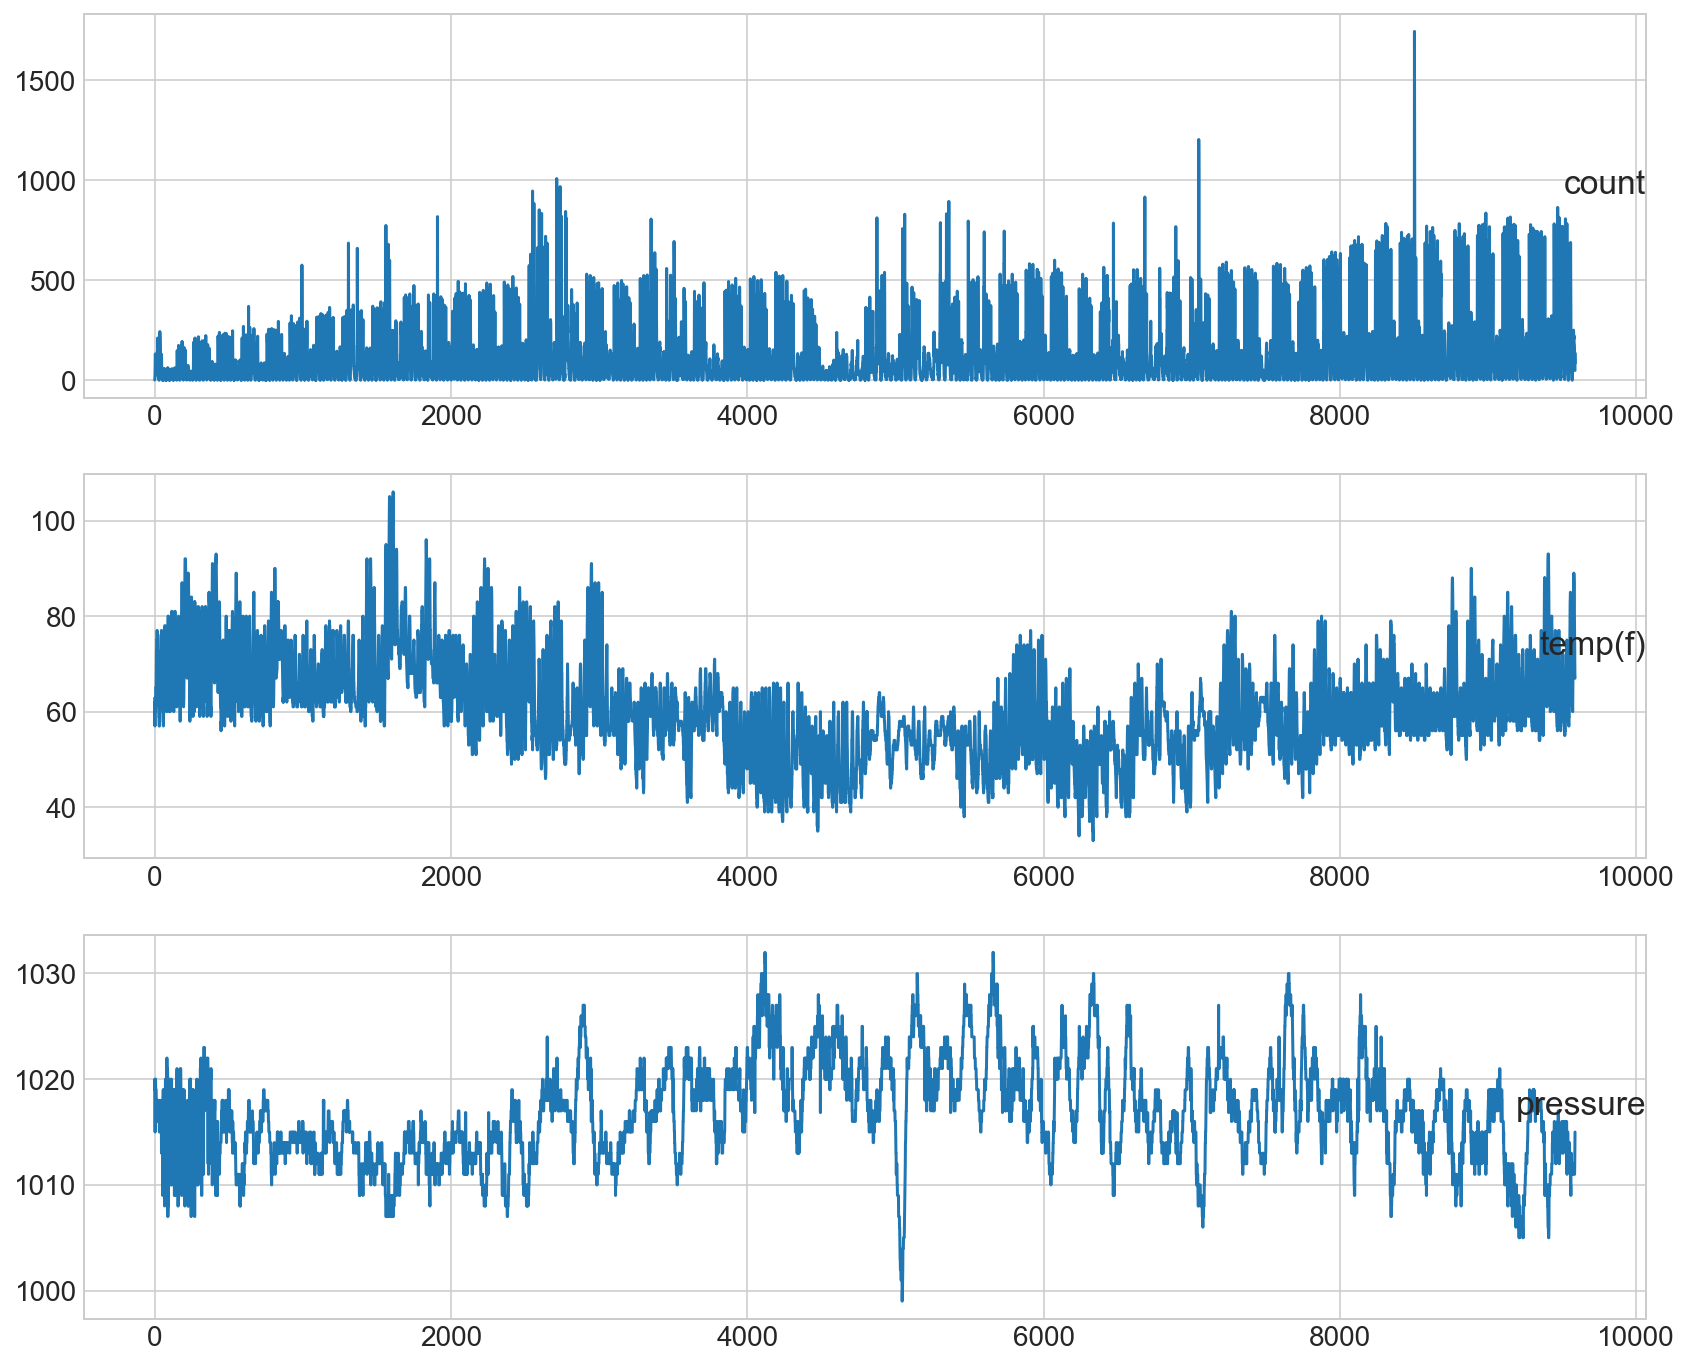

In [374]:
#Plotting values 
from matplotlib import pyplot

# specify columns to plot
groups = [0, 2, 3]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [375]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [376]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# integer encode day of the week - Not necessary, day of the week is already an integer
#encoder = LabelEncoder()
#values[:,2] = encoder.fit_transform(values[:,2])
#values

In [377]:
# ensure all data is float
values = values.astype('float32')
# normalize features  
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)



#Failed attempt to not scale count
#temp = scaler.fit_transform(values[:, :-1])
#temp.shape
#values[:, -1].shape
#values[:, -1].T
#scaled = np.concatenate((temp, values[:, -1].T),axis=1)
#scaled

In [378]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)  var2(t)   var3(t)  \
1   0.000574        1.0   0.397260   0.606060  0.002870      1.0  0.369863   
2   0.002870        1.0   0.369863   0.636364  0.013203      1.0  0.328767   
3   0.013203        1.0   0.328767   0.636364  0.035591      1.0  0.410959   
4   0.035591        1.0   0.410959   0.484848  0.075201      0.0  0.369863   
5   0.075201        0.0   0.369863   0.636364  0.075201      1.0  0.369863   

    var4(t)  
1  0.636364  
2  0.636364  
3  0.484848  
4  0.636364  
5  0.636364  


In [379]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.000574        1.0   0.397260   0.606060  0.002870
2   0.002870        1.0   0.369863   0.636364  0.013203
3   0.013203        1.0   0.328767   0.636364  0.035591
4   0.035591        1.0   0.410959   0.484848  0.075201
5   0.075201        0.0   0.369863   0.636364  0.075201


In [380]:
len(values)

9589

In [381]:
# split into train and test sets 
#First 9 months of data set in train data (273 days)
#Last 4 months for test (127 days)
values = reframed.values
#n_train_hours = 273 * 24
#train = values[:n_train_hours, :]
#test = values[n_train_hours:, :]

#len(values)
#Previous 5 weeks (minus last one) for train data
n_test_hours = 7 * 24
n_start_train_hours = n_test_hours + 28 * 24
n_start_test_hours = 7 * 24
#Last 7 days of dataset for test data
#n_test_hours = 7 * 24
train = values[len(values)-n_start_train_hours:len(values)-n_test_hours, :]
test = values[len(values)-n_test_hours:, :]


In [382]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [383]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(672, 1, 4) (672,) (168, 1, 4) (168,)


In [384]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


Train on 672 samples, validate on 168 samples
Epoch 1/50
 - 2s - loss: 0.0914 - val_loss: 0.0915
Epoch 2/50
 - 0s - loss: 0.0772 - val_loss: 0.0820
Epoch 3/50
 - 0s - loss: 0.0738 - val_loss: 0.0794
Epoch 4/50
 - 0s - loss: 0.0702 - val_loss: 0.0786
Epoch 5/50
 - 0s - loss: 0.0682 - val_loss: 0.0758
Epoch 6/50
 - 0s - loss: 0.0663 - val_loss: 0.0741
Epoch 7/50
 - 0s - loss: 0.0649 - val_loss: 0.0725
Epoch 8/50
 - 0s - loss: 0.0630 - val_loss: 0.0708
Epoch 9/50
 - 0s - loss: 0.0615 - val_loss: 0.0693
Epoch 10/50
 - 0s - loss: 0.0598 - val_loss: 0.0674
Epoch 11/50
 - 0s - loss: 0.0583 - val_loss: 0.0657
Epoch 12/50
 - 0s - loss: 0.0567 - val_loss: 0.0639
Epoch 13/50
 - 0s - loss: 0.0550 - val_loss: 0.0620
Epoch 14/50
 - 0s - loss: 0.0534 - val_loss: 0.0606
Epoch 15/50
 - 0s - loss: 0.0519 - val_loss: 0.0588
Epoch 16/50
 - 0s - loss: 0.0505 - val_loss: 0.0575
Epoch 17/50
 - 0s - loss: 0.0491 - val_loss: 0.0561
Epoch 18/50
 - 0s - loss: 0.0479 - val_loss: 0.0548
Epoch 19/50
 - 0s - loss: 0

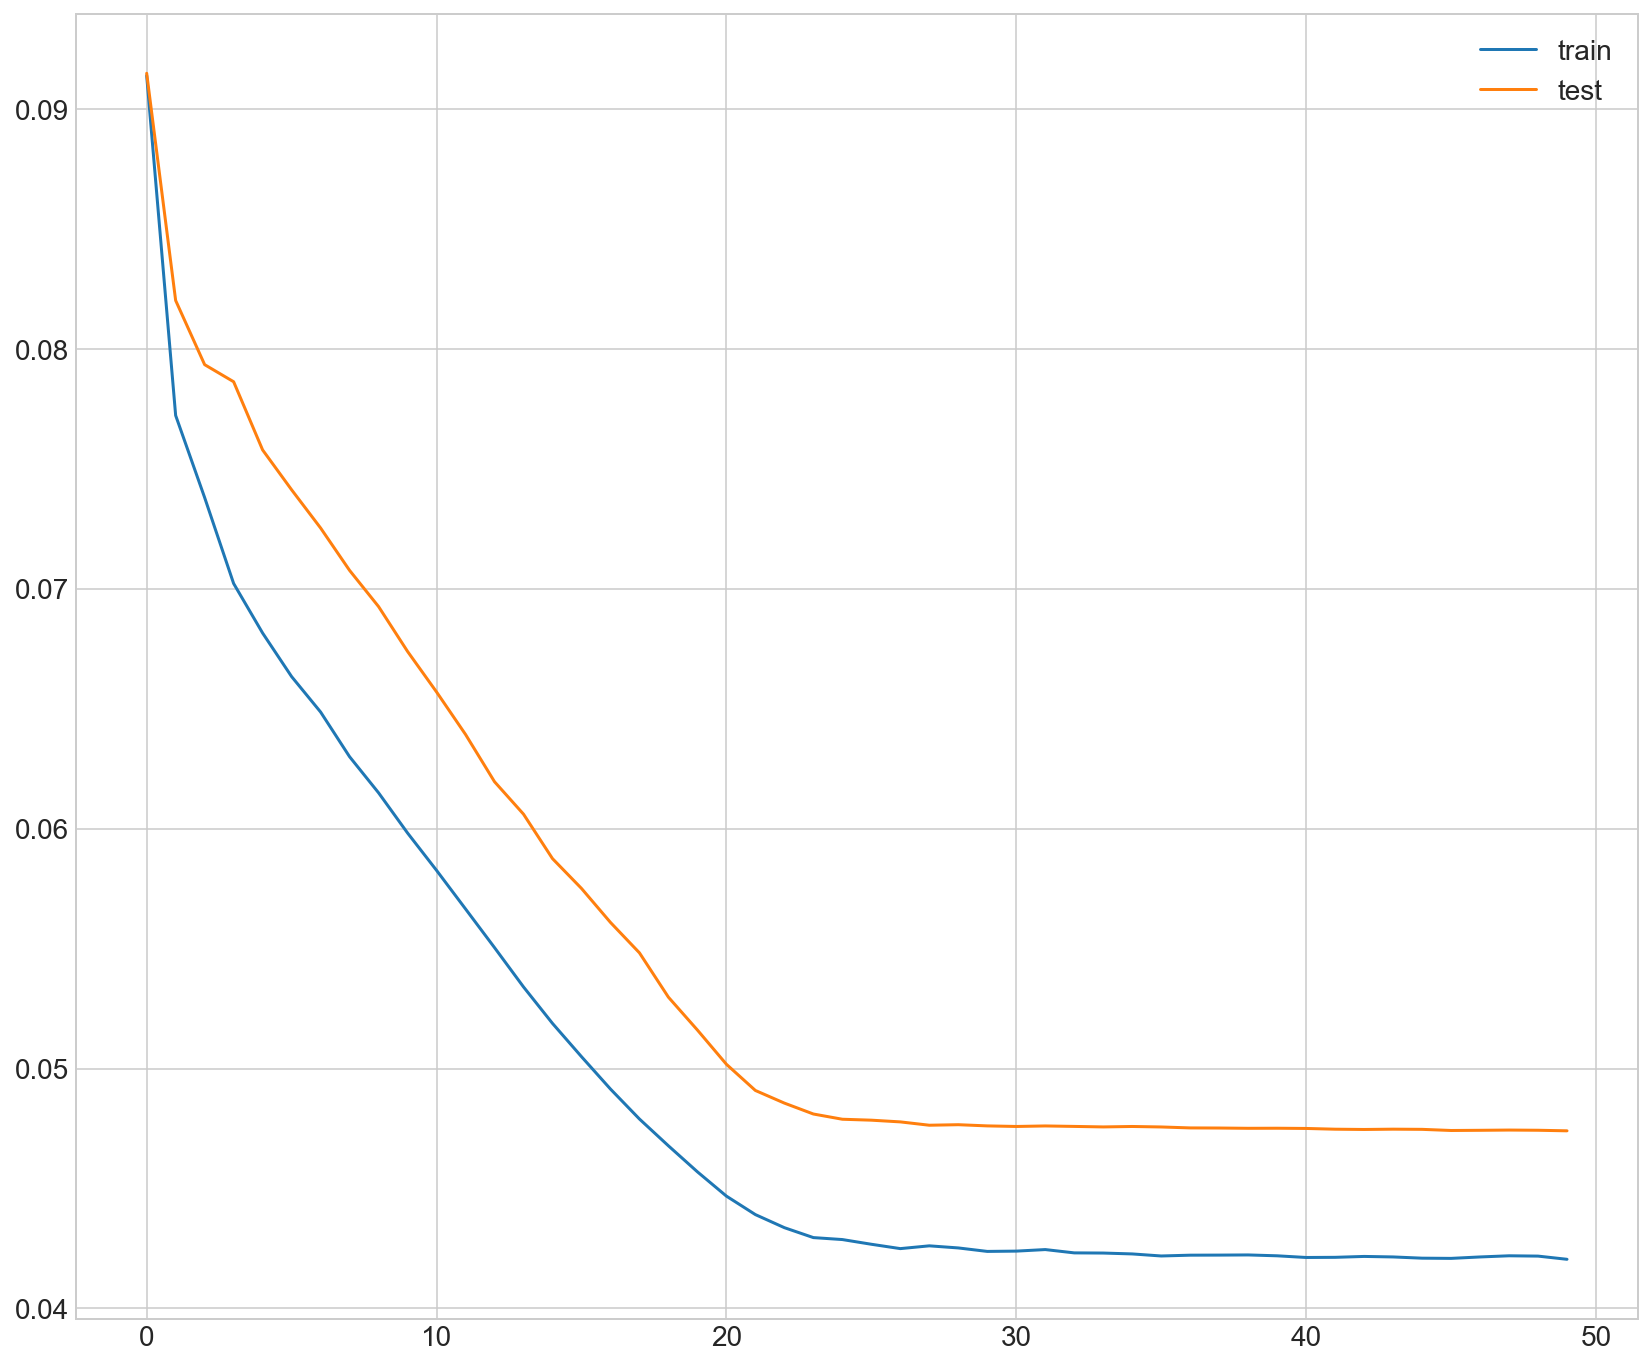

In [385]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [386]:
test_X.shape

(168, 1, 4)

In [387]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [388]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]


In [389]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 141.232


Notes:
- We are not considering seasonality, day (of the week), hour
- This is predicting values based on the last hour, but would it be better if it looked at the previous week either additionally or as an alternative?
- Maybe LSTM is not the best model for this problem. From website https://machinelearningmastery.com/suitability-long-short-term-memory-networks-time-series-forecasting/
"They later conclude the paper and discuss that based on the results, LSTMs may not be suited to AR type formulations of time series forecasting, at least when the lagged observations are close to the time being forecasted."

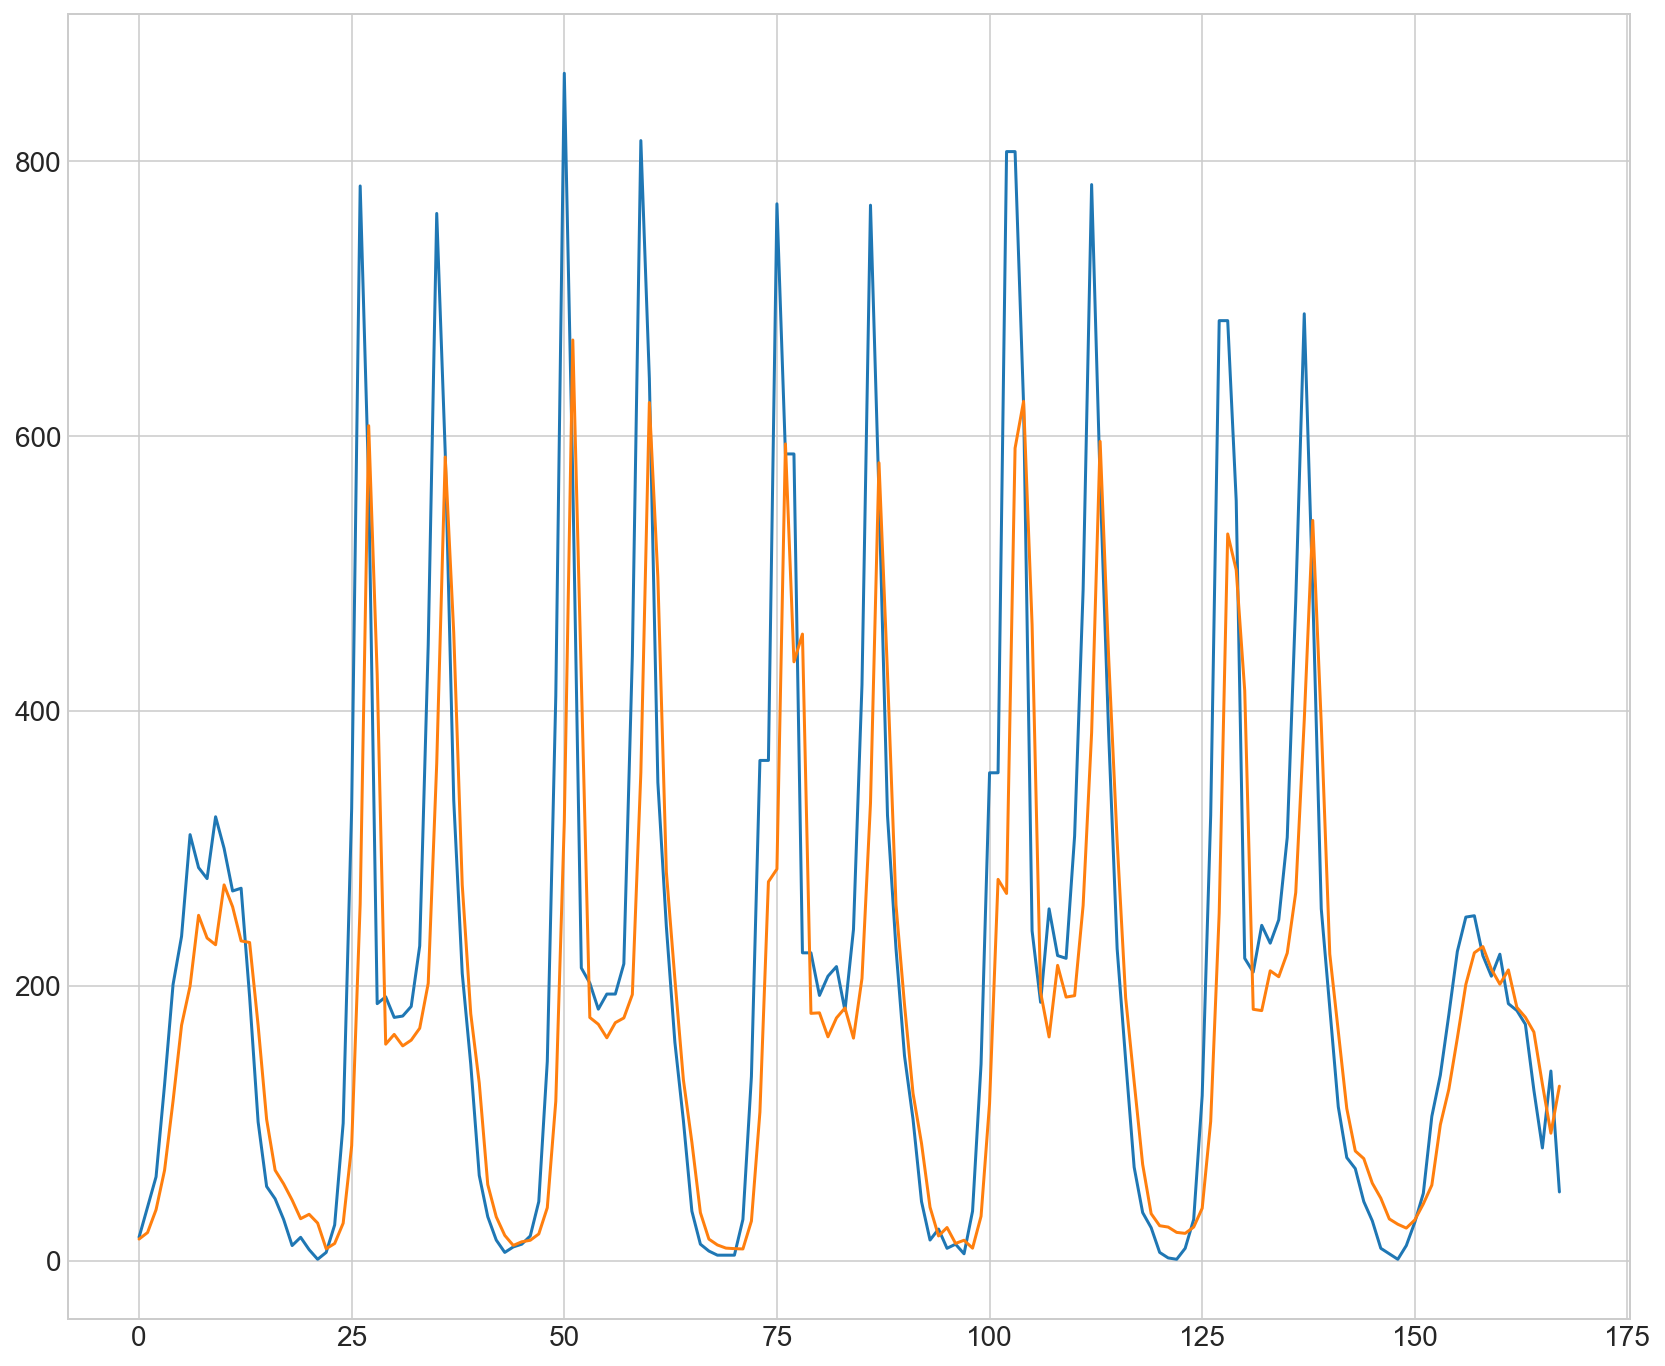

In [390]:
plt.plot(inv_y)
plt.plot(inv_yhat)

In [262]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

NameError: name 'trainX' is not defined